# Product Title Recommender Examples

This notebook demonstrates how to use the Product Title Recommender feature to evaluate product titles and get recommendations for improvement.

## Setup and Configuration

First, let's import the necessary modules and set up our environment.

In [1]:
# Import required libraries
%pip install langchain_community
import os
import sys
import json
from dotenv import load_dotenv
import pandas as pd

# Add the parent directory to the path to import from src
sys.path.append(os.path.abspath('..'))

# Import project modules
from src.features.product_title_recommender.title_recommender import TitleRecommender
from src.models.llm_integrations import LLMFactory
from src.common.utils import load_json

# Load environment variables from .env file
load_dotenv()

# Check if OpenAI API key is set
if not os.getenv("OPENAI_API_KEY"):
    print("⚠️ Warning: OPENAI_API_KEY is not set in your .env file.")
    print("Please set this up before running the examples.")
else:
    print("✅ OpenAI API key found!")

20.54s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


/Users/veranky/Documents/Personal/STTI/python_projects/ecommerce-genai-apps/stti-venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


✅ OpenAI API key found!


## Load Sample Data

Now let's load the sample product data from the JSON file.

In [6]:
# Define path to sample data
sample_data_path = '/Users/veranky/Documents/Personal/STTI/python_projects/ecommerce-genai-apps/data/sample_products.json'

# Load sample products with error handling
data = load_json(sample_data_path)
if data is None:
	print(f"⚠️ Failed to load data from {sample_data_path}. Please check if the file exists and contains valid JSON.")
	products = []
else:
	products = data.get('products', [])

# Display sample products as a DataFrame if products are loaded
if products:
	df_products = pd.DataFrame(products)
	df_products
else:
	print("⚠️ No products found in the loaded data.")

## Create Title Recommender Instance

Let's create an instance of the TitleRecommender class. We'll use OpenAI's GPT-4 as the default model, but you can change this to another model if you prefer.

In [7]:
# Create title recommender with OpenAI GPT-4
recommender = TitleRecommender(model_type='openai', model_name='gpt-4')

# If you want to use a different OpenAI model, you can uncomment the line below
# recommender = TitleRecommender(model_type='openai', model_name='gpt-3.5-turbo')

/Users/veranky/Documents/Personal/STTI/python_projects/ecommerce-genai-apps/src/models/llm_integrations.py:30: LangChainDeprecationWarning: The class `ChatOpenAI` was deprecated in LangChain 0.0.10 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-openai package and should be used instead. To use it run `pip install -U :class:`~langchain-openai` and import as `from :class:`~langchain_openai import ChatOpenAI``.
  return ChatOpenAI(
/Users/veranky/Documents/Personal/STTI/python_projects/ecommerce-genai-apps/src/features/product_title_recommender/title_analyzer.py:50: LangChainDeprecationWarning: The class `LLMChain` was deprecated in LangChain 0.1.17 and will be removed in 1.0. Use :meth:`~RunnableSequence, e.g., `prompt | llm`` instead.
  self.evaluation_chain = LLMChain(
/Users/veranky/Documents/Personal/STTI/python_projects/ecommerce-genai-apps/src/features/product_title_recommender/title_analyzer.py:50: LangChainDeprecationWarning: The clas

## Evaluate a Single Product Title

Let's start by evaluating a single product title from our sample data.

In [8]:
# Select the first product title
sample_title = products[0]['title']
print(f"Evaluating title: '{sample_title}'")

# Get recommendation for the selected title
recommendation = recommender.get_recommendation(sample_title)

# Display the recommendation
print(f"\nRating: {recommendation['evaluation']['rating']}")
print(f"Reasoning: {recommendation['evaluation']['reasoning']}")
print(f"\nSuggested attributes to add:")
for attr in recommendation['suggested_attributes']:
    print(f"- {attr}")

if recommendation['improved_title']:
    print(f"\nImproved title: '{recommendation['improved_title']}'")

# Show the complete recommendation as JSON
print("\nComplete recommendation:")
print(json.dumps(recommendation, indent=2))

Evaluating title: 'Lacoste Elite Active 224 2 SMA'


/Users/veranky/Documents/Personal/STTI/python_projects/ecommerce-genai-apps/src/features/product_title_recommender/title_analyzer.py:66: LangChainDeprecationWarning: The method `Chain.run` was deprecated in langchain 0.1.0 and will be removed in 1.0. Use :meth:`~invoke` instead.
  result = self.evaluation_chain.run(title=title)



Rating: Needs Improvement
Reasoning: While the product title includes the brand and model, it lacks important information that would help potential buyers understand what the product is. The title does not specify the type of product, its main features, or its intended use.

Suggested attributes to add:
- Product type
- Color
- Size
- Material

Improved title: 'Lacoste Elite Active 224 2 SMA Men's Black Leather Sneakers, Size 10'

Complete recommendation:
{
  "original_title": "Lacoste Elite Active 224 2 SMA",
  "evaluation": {
    "rating": "Needs Improvement",
    "reasoning": "While the product title includes the brand and model, it lacks important information that would help potential buyers understand what the product is. The title does not specify the type of product, its main features, or its intended use.",
    "suggested_attributes": [
      "Product type",
      "Color",
      "Size",
      "Material"
    ],
    "improved_title": "Lacoste Elite Active 224 2 SMA Men's Black L

## Batch Evaluation of All Product Titles

Now let's evaluate all product titles in our sample data.

In [9]:
# Get batch recommendations
print("Evaluating all product titles...")
recommendations = recommender.get_batch_recommendations(products)

# Create a DataFrame for better visualization
recommendations_summary = []

for rec in recommendations:
    summary = {
        'product_id': rec['product_id'],
        'original_title': rec['original_title'],
        'rating': rec['evaluation']['rating'],
        'needs_improvement': rec['needs_improvement'],
        'improved_title': rec['improved_title']
    }
    recommendations_summary.append(summary)

df_recommendations = pd.DataFrame(recommendations_summary)
df_recommendations

Evaluating all product titles...


,product_id,original_title,rating,needs_improvement,improved_title
0,P001,Lacoste Elite Active 224 2 SMA,Needs Improvement,True,Lacoste Elite Active 224 2 SMA Men's White Lea...
1,P002,6 ' Fiberglass Step Ladder Folding,Needs Improvement,True,"Werner 6' Fiberglass Step Ladder, 300 lbs Weig..."
2,P003,BRAND NEW GUCCI Ophidia Black Suede Leather Do...,Good,False,None
3,P004,Bose QuietComfort Ultra Noise Cancelling Headp...,Good,False,None
4,P005,NWT Loft Red Blouse Floral Lace Trim Mixed Med...,Needs Improvement,True,NWT Loft Small Red Floral Lace Trim Tunic Top ...


## Detailed Analysis of Each Recommendation

Let's examine each recommendation in more detail.

In [10]:
# Display detailed analysis for each product title
for i, rec in enumerate(recommendations):
    product_id = rec['product_id']
    title = rec['original_title']
    rating = rec['evaluation']['rating']
    reasoning = rec['evaluation']['reasoning']
    
    print(f"\n{'='*80}")
    print(f"Product {i+1}: {product_id}")
    print(f"{'='*80}")
    print(f"Original Title: '{title}'")
    print(f"\nRating: {rating}")
    print(f"\nReasoning:\n{reasoning}")
    
    print(f"\nSuggested attributes to add:")
    for attr in rec['suggested_attributes']:
        print(f"- {attr}")
    
    if rec['improved_title']:
        print(f"\nImproved title: '{rec['improved_title']}'")


Product 1: P001
Original Title: 'Lacoste Elite Active 224 2 SMA'

Rating: Needs Improvement

Reasoning:
The product title lacks important information that would help potential buyers understand what the product is. It is unclear whether the product is a shoe, a shirt, or some other item. The title also does not include any details about the product's size, color, or material.

Suggested attributes to add:
- Product type
- Color
- Size
- Material

Improved title: 'Lacoste Elite Active 224 2 SMA Men's White Leather Sneakers, Size 10'

Product 2: P002
Original Title: '6 ' Fiberglass Step Ladder Folding'

Rating: Needs Improvement

Reasoning:
The product title is too short and lacks important details that could attract potential buyers. It does not provide information about the brand, the weight capacity, the number of steps, or any special features of the ladder.

Suggested attributes to add:
- Brand
- Weight Capacity
- Number of Steps
- Special Features

Improved title: 'Werner 6' Fiber

## Comparing Original vs. Improved Titles

Let's create a clear side-by-side comparison of original and improved titles.

In [11]:
# Create a DataFrame with original and improved titles
comparison_data = []

for rec in recommendations:
    if rec['needs_improvement']:
        item = {
            'product_id': rec['product_id'],
            'original_title': rec['original_title'],
            'improved_title': rec['improved_title']
        }
        comparison_data.append(item)

df_comparison = pd.DataFrame(comparison_data)

# Display the comparison if there are any titles that need improvement
if len(df_comparison) > 0:
    print(f"Found {len(df_comparison)} products with titles that need improvement:")
    display(df_comparison)
else:
    print("All product titles are already good!")

Found 3 products with titles that need improvement:


,product_id,original_title,improved_title
0,P001,Lacoste Elite Active 224 2 SMA,Lacoste Elite Active 224 2 SMA Men's White Lea...
1,P002,6 ' Fiberglass Step Ladder Folding,"Werner 6' Fiberglass Step Ladder, 300 lbs Weig..."
2,P005,NWT Loft Red Blouse Floral Lace Trim Mixed Med...,NWT Loft Small Red Floral Lace Trim Tunic Top ...


## Save Recommendations to a File

Let's save the recommendations to a JSON file for later use.

In [13]:
# Save recommendations to a file
output_file = '/Users/veranky/Documents/Personal/STTI/python_projects/ecommerce-genai-apps/data/title_recommendations_output.json'

# Save the recommendations
success = recommender.save_recommendations(recommendations, output_file)

if success:
    print(f"✅ Recommendations saved to {output_file}")
else:
    print(f"❌ Failed to save recommendations to {output_file}")

✅ Recommendations saved to /Users/veranky/Documents/Personal/STTI/python_projects/ecommerce-genai-apps/data/title_recommendations_output.json


## Analysis of Title Quality

Let's analyze the overall quality of our product titles.

Total product titles analyzed: 5
Titles with 'Good' rating: 2 (40.0%)
Titles needing improvement: 3 (60.0%)


509.57s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/7.8 MB ? eta -:--:--Downloading matplotlib-3.9.4-cp39-cp39-macosx_11_0_arm64.whl (7.8 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 6.0 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/2.8 MB ? eta -:--:--Downloading fonttools-4.57.0-cp39-cp39-macosx_10_9_universal2.whl (2.8 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7/7 [matplotlib]7 [matplotlib]
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7/7 [matplotlib]
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


Matplotlib is building the font cache; this may take a moment.


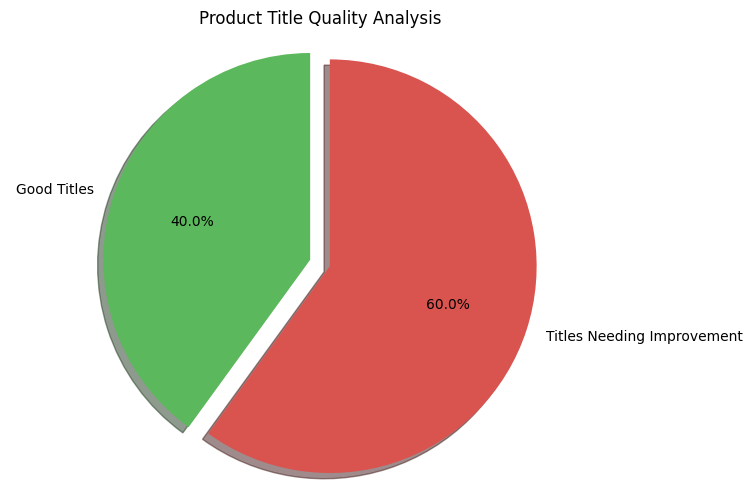

In [15]:
# Calculate statistics about the title quality
total_titles = len(recommendations)
needs_improvement = sum(1 for rec in recommendations if rec['needs_improvement'])
good_titles = total_titles - needs_improvement
improvement_percentage = (needs_improvement / total_titles) * 100 if total_titles > 0 else 0

print(f"Total product titles analyzed: {total_titles}")
print(f"Titles with 'Good' rating: {good_titles} ({100 - improvement_percentage:.1f}%)")
print(f"Titles needing improvement: {needs_improvement} ({improvement_percentage:.1f}%)")

# Let's create a simple pie chart to visualize this
%pip install matplotlib
import matplotlib.pyplot as plt

labels = ['Good Titles', 'Titles Needing Improvement']
sizes = [good_titles, needs_improvement]
colors = ['#5cb85c', '#d9534f']
explode = (0, 0.1)  # explode the 2nd slice (Titles needing improvement)

plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Product Title Quality Analysis')
plt.show()

## Conclusion

In this notebook, we've demonstrated how to use the Title Recommender to evaluate product titles and get recommendations for improvement. The Title Recommender can help identify titles that may not be effective at attracting buyers and provides specific suggestions for improvement.

Next steps could include:
- Analyzing a larger dataset of product titles
- Comparing results from different LLM models
- Implementing the suggested improvements and tracking the impact on product performance
- Integrating this functionality into an automated product listing workflow

## Additional Experiments

You can use the following cell to experiment with custom product titles.

In [16]:
# Test with your own product title
custom_title = "Your product title here"  # Replace with your own title to test

# Get recommendation
custom_recommendation = recommender.get_recommendation(custom_title)

# Display the recommendation
print(f"Title: '{custom_title}'")
print(f"Rating: {custom_recommendation['evaluation']['rating']}")
print(f"Reasoning: {custom_recommendation['evaluation']['reasoning']}")
print(f"\nSuggested attributes to add:")
for attr in custom_recommendation['suggested_attributes']:
    print(f"- {attr}")

if custom_recommendation['improved_title']:
    print(f"\nImproved title: '{custom_recommendation['improved_title']}'")

Title: 'Your product title here'
Rating: Needs Improvement
Reasoning: The product title 'Your product title here' is not effective as it does not provide any information about the product. It is generic and does not describe what the product is, its features, brand, or any other relevant details that would attract buyers.

Suggested attributes to add:
- product name
- brand
- key features
- product type
- size
- color

Improved title: 'Brand Name Women's Red Leather Jacket, Size Medium with Zipper Pockets'
